# Retrieve connection information from a JSON file

In [2]:
import json

#  load secrets.json file 
with open('E:\git.json') as f:
    data = json.load(f)

    secret_pass = data['mongodb']

#  print the length of the secret pass.
print(f"My secret key is {len(secret_pass)} characters in length.")

My secret key is 79 characters in length.


# Connect to MongoDB and display all collections in the database 

In [3]:
import pymongo
import certifi

#  use the retrieved connection string from a secrets file
mongo_connection_string = data['mongodb']

# Connecting to the database 
client = pymongo.MongoClient(mongo_connection_string, tlsCAFile=certifi.where())

# Fetch the database named "DA320"
da320_database = client['DA320']

# display the database with all collections: we have two collection in DA320 (IMDB) and (Metacritic).
allCollections = da320_database.list_collection_names()

# list of collections in my database
print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {allCollections}")

Using MongoDB version 6.0.6.
This database has the collections ['Metacritic', 'IMDB']


# Fetch a collection from a MongoDB server

In [4]:
import pandas as pd

# Retrieve all records from  collection IMDB
cursor = da320_database["IMDB"].find()

# Convert this information into a Pandas dataframe
imdb = pd.DataFrame(cursor)

# Display collection IMDB
display(imdb)

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,6455f4b8d5ed4bb1a0efe52c,77631,Grease,110.0,7.2,265183,TV-14::(D),6/13/1978,6000000.0,60759.0,394955690.0,"Comedy, Musical, Romance","John Travolta, Olivia Newton-John, Stockard Ch...",Randal Kleiser,"Allan Carr, Neil A. Machlis, Robert Stigwood","Paramount Pictures, Robert Stigwood Organizati..."
1,6455f4b8d5ed4bb1a0efe52d,78346,Superman,143.0,7.4,172769,TV-PG::(LV),12/10/1978,55000000.0,7465343.0,166200000.0,"Action, Adventure, Sci-Fi","Marlon Brando, Gene Hackman, Christopher Reeve...",Richard Donner,"Charles Greenlaw, Richard Lester, Alexander Sa...","Dovemead Films, Film Export A.G., Internationa..."
2,6455f4b8d5ed4bb1a0efe52e,77416,The Deer Hunter,183.0,8.1,334827,R,12/8/1978,15000000.0,NaN,NaN,"Drama, War","Robert De Niro, John Cazale, John Savage, Chri...",Michael Cimino,"Joann Carelli, Michael Cimino, Michael Deeley,...","EMI Films, Universal Pictures"
3,6455f4b8d5ed4bb1a0efe52f,77651,Halloween,91.0,7.7,267109,TV-14,10/25/1978,300000.0,NaN,70000000.0,"Horror, Thriller","Donald Pleasence, Jamie Lee Curtis, Nancy Kyes...",John Carpenter,"Moustapha Akkad, John Carpenter, Debra Hill, K...","Compass International Pictures, Falcon Interna..."
4,6455f4b8d5ed4bb1a0efe530,77975,National Lampoon's Animal House,109.0,7.4,119917,"TV-14::(DLSV, TV Rating.)",7/27/1978,3000000.0,201747.0,3371006.0,Comedy,"Tom Hulce, Stephen Furst, Mark Metcalf, Mary L...",John Landis,"Ivan Reitman, Matty Simmons","Universal Pictures, Oregon Film Factory, Stage..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29438,6455f4c2d5ed4bb1a0f0582a,11691722,Schweinsteiger Memories: Von Anfang bis Legende,112.0,7.5,1085,None,6/5/2020,NaN,NaN,NaN,"Documentary, Biography, Sport","Bastian Schweinsteiger, Ana Ivanovic, Fred Sch...",Robert Bohrer,"Sebastian Schweiger, Til Schweiger, Christian ...",Barefoot Films
29439,6455f4c2d5ed4bb1a0f0582b,13074322,The Gulf of Silence,85.0,5.1,1483,NaN,12/4/2020,NaN,NaN,NaN,Sci-Fi,"Mandy May Cheetham, Donald E. Keyhoe, Richard ...",M.K. Rhodes,", , , ,",", , , ,"
29440,6455f4c2d5ed4bb1a0f0582c,12839816,Asalu Em Jarigindhante,110.0,7.5,5297,None,8/2/2020,NaN,NaN,NaN,Drama,"Karunya Chowdary, KarronyaKatrynn, Mahendran, ...",Srinivas Bandari,Shaani Soloman,"ABR Productions, GSFilms"
29441,6455f4c2d5ed4bb1a0f0582d,11041466,Oka Chinna Viramam,95.0,6.3,2797,None,2/14/2020,15000000.0,NaN,NaN,Thriller,"Punarnavi Bhupalam, Garima, Naveen Neni, Sanja...",Sundeep Cheguri,"Sundeep Cheguri, Abhilash Reddy","Moonwalk Entertainments, Sri Balaji Video"


# Choosing columns from IMDB collection 

In [12]:

import pandas

# Transform  release_date to the date with pandas
imdb.release_date = pandas.to_datetime(imdb['release_date'], errors='coerce')

# Transform  runtime to the number with pandas 
imdb.runtime = pandas.to_numeric(imdb['runtime'], errors='coerce')

# Transform  budget to the number with pandas
imdb.budget = pandas.to_numeric(imdb['budget'], errors='coerce')

# Picking three colmns of collection IDBM
columns = imdb[ ["release_date", "runtime", "budget"]]

# Convert privioues information into a Pandas dataframe
imdb = pd.DataFrame(columns)

# display dataframe IMDB 
display (imdb)


,release_date,runtime,budget
0,1978-06-13,110.0,6000000.0
1,1978-12-10,143.0,55000000.0
2,1978-12-08,183.0,15000000.0
3,1978-10-25,91.0,300000.0
4,1978-07-27,109.0,3000000.0
...,...,...,...
29438,2020-06-05,112.0,NaN
29439,2020-12-04,85.0,NaN
29440,2020-08-02,110.0,NaN
29441,2020-02-14,95.0,15000000.0


# Cleaning the dataset IMDB 

In [13]:
# removeing all Null values 
imdb = pd.DataFrame(columns)
clean_imdb=imdb.dropna()
display(clean_imdb)

,release_date,runtime,budget
0,1978-06-13,110.0,6000000.0
1,1978-12-10,143.0,55000000.0
2,1978-12-08,183.0,15000000.0
3,1978-10-25,91.0,300000.0
4,1978-07-27,109.0,3000000.0
...,...,...,...
29430,2020-02-21,92.0,1000000.0
29434,2020-05-22,127.0,250000.0
29436,2020-02-27,76.0,1000000.0
29437,2020-05-02,45.0,4000.0


# Create a chart showing Runtime and Budget plotted against release date 

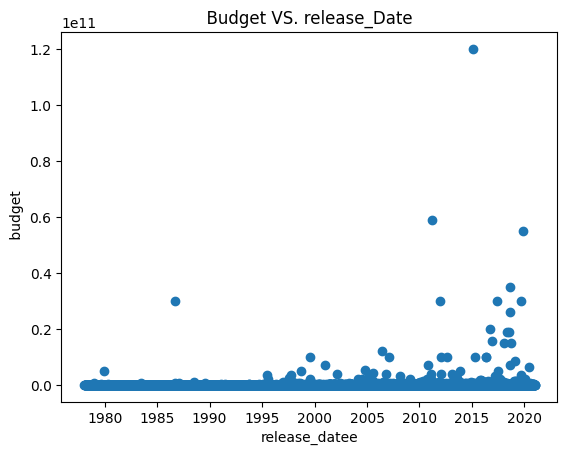

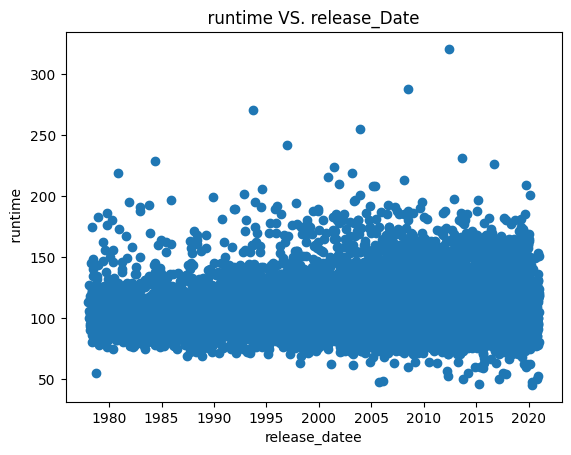

In [7]:
from matplotlib import pyplot

#budget plot
pyplot.title('  Budget VS. release_Date  ')
pyplot.xlabel('release_datee')
pyplot.ylabel(' budget')
pyplot.scatter(clean_imdb['release_date'],  clean_imdb[ 'budget'] )
pyplot.show()

#runtime plot
pyplot.title('  runtime VS. release_Date  ')
pyplot.xlabel('release_datee')
pyplot.ylabel(' runtime')
pyplot.scatter(clean_imdb['release_date'],  clean_imdb[ 'runtime'] )
pyplot.show()



# Detecting outliers

** Find mild and extreme Outliers for Budget Column **

In [8]:

    
#calculate first quartile for budget column
budget_q1=clean_imdb["budget"].quantile(0.25)
print("Q1 = ", budget_q1)
    
#calculate thierd quartile for budget column
budget_q3=clean_imdb["budget"].quantile(0.75)
print ("Q3 = ", budget_q3)
    
#calculate interquartile range (IQR)
budget_iqr=budget_q3-budget_q1
print ("IQR = " , budget_iqr)
print()

#calculate mild outlier
print ("------ Mild Outlier for budget ------")
print()

#Calculate lower_inner_fence
lower_inner_fence = budget_q1- 1.5*budget_iqr
print("lower_inner_fence = ", lower_inner_fence )

#Calculate upper_inner_fence
upper_inner_fence = budget_q3+ 1.5*budget_iqr
print("C = ", upper_inner_fence )
print()

#Calculate which data is greater than upper_inner_fence and which one is less than lower_inner_fence
budget_outlier = clean_imdb["budget"] [(clean_imdb["budget"] < lower_inner_fence) | (clean_imdb["budget"] > upper_inner_fence)]
display(budget_outlier)
print()

#Calculate extreme outlier
print ("------ Extreme Outlier for budget ------")
print()

#Calculate lower_outer_fence 
lower_outer_fence  = budget_q1- 3*budget_iqr
print("lower_outer_fence = ", lower_outer_fence )

#Calculate upper_outer_fence 
upper_outer_fence = budget_q3+ 3*budget_iqr
print("upper_outer_fence = ", upper_outer_fence )
print()

#Calculate which data is greater than upper_outer_fence and which one is less than lower_outer_fence
budget_outlier = clean_imdb ["budget"] [(clean_imdb["budget"] < lower_outer_fence) | (clean_imdb["budget"] > upper_outer_fence)]
display(budget_outlier)


Q1 =  2995085.75
Q3 =  28000000.0
IQR =  25004914.25

------ Mild Outlier for budget ------

lower_inner_fence =  -34512285.625
C =  65507371.375



225      5.000000e+08
311      4.100000e+08
335      5.000000e+09
561      4.000000e+08
1168     9.000000e+07
             ...     
29262    2.000000e+08
29274    5.500000e+08
29360    2.500000e+08
29362    5.000000e+08
29392    7.000000e+07
Name: budget, Length: 1398, dtype: float64


------ Extreme Outlier for budget ------

lower_outer_fence =  -72019657.0
upper_outer_fence =  103014742.75



225      5.000000e+08
311      4.100000e+08
335      5.000000e+09
561      4.000000e+08
1364     5.000000e+08
             ...     
29167    2.500000e+08
29262    2.000000e+08
29274    5.500000e+08
29360    2.500000e+08
29362    5.000000e+08
Name: budget, Length: 829, dtype: float64